In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mnist_utils as mu
import random
import relu_utils as alg
import spiking_relu as sr
import copy

#Figure 1: Physics measurement of noisy current
Implement sigert in python

#Figure 2: noisy_current against firing rate

In [2]:
cell_params_lif = {'cm': 1.,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 1.,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -55.0,
                   'v_rest': -53.0,
                   'v_thresh': -50.0
                   }

In [3]:
def noise_current(current, stdnoise, cell_params_lif, trial):
    import pyNN.nest as p
    runtime = 10000.
    p.setup(timestep=1.0, min_delay=1.0, max_delay=16.0)
    poplist = []
    ratelist = np.zeros(trial)
    for i in range(trial):
        pop = p.Population(1, p.IF_curr_exp, cell_params_lif)
        noise = p.NoisyCurrentSource(mean=current, stdev=stdnoise, start=0, stop=runtime, dt=1.0,rng=p.NativeRNG(seed=i))
        noise.inject_into(pop)
        pop.record()
        poplist.append(pop)
    p.run(runtime)
    for i in range(trial):
        spikes = poplist[i].getSpikes(compatible_output=True)
        ratelist[i] = len(spikes)*1000./runtime
    p.end()
    return ratelist.mean(), ratelist.max(), ratelist.min()

In [4]:
trial = 10
stdnoise = np.array([0.2, 0.5, 1., 2., 5.])
current = np.arange(-0.5,1,0.1)

x_num = current.size
noise_num = stdnoise.size
rate_mean = np.zeros((x_num, stdnoise.size))
rate_max = np.zeros((x_num, stdnoise.size))
rate_min = np.zeros((x_num, stdnoise.size))
for j in range(noise_num):
    for i in range(x_num):
        rate_mean[i,j], rate_max[i,j], rate_min[i,j] = noise_current(current[i], stdnoise[j], cell_params_lif,trial)
#plt.plot(current, rate_mean, 'green')
#plt.fill_between(current, rate_min, rate_max, facecolor='green', alpha=0.5, interpolate=True)

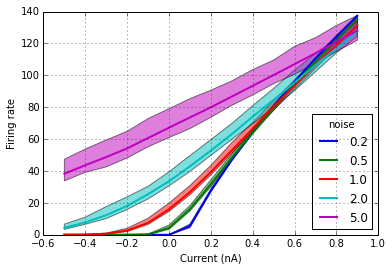

In [42]:
curve = plt.plot(current, rate_mean, linewidth=2)
for i in range(len(curve)):
    c = plt.getp(curve[i],'color')
    plt.fill_between(current, rate_min[:,i], rate_max[:,i], facecolor=c, alpha=0.5, interpolate=True)
    plt.grid('on')
    plt.xlabel('Current (nA)')
    plt.ylabel('Firing rate')
    plt.legend(curve, stdnoise, title='noise', loc='lower right') #, shadow=True loc='upper left'

#Figure 3: noisy current generated by Poisson spikes vs. firing rate
y_noise = np.sqrt(signal.convolve2d(abs(xi),np.transpose(w**2.),mode='valid'))

In [ ]:
def noise_current(current, stdnoise, cell_params_lif, trial):
    import pyNN.nest as p
    runtime = 10000.
    p.setup(timestep=1.0, min_delay=1.0, max_delay=16.0)
    poplist = []
    ratelist = np.zeros(trial)
    for i in range(trial):
        pop = p.Population(1, p.IF_curr_exp, cell_params_lif)
        noise = p.NoisyCurrentSource(mean=current, stdev=stdnoise, start=0, stop=runtime, dt=1.0,rng=p.NativeRNG(seed=i))
        noise.inject_into(pop)
        pop.record()
        poplist.append(pop)
    p.run(runtime)
    for i in range(trial):
        spikes = poplist[i].getSpikes(compatible_output=True)
        ratelist[i] = len(spikes)*1000./runtime
    p.end()
    return ratelist.mean(), ratelist.max(), ratelist.min()

#Figure 4: noisy_softplus vs. all the above with scaled output

#Figure 5: noisy_softplus in 3D

#Figure 6: real application on 1-layer conv net

#Figure 7: real application using trained weights: extracted feature 
compare with ANN in every layer

#Figure 8: loss function in ANN training
sigmoid ReLU Softplus Noisy_softplus